In [820]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [821]:
train = pd.read_csv("C:/Users/user/Documents/Kaggle/Bike-Sharing-Demand/train.csv")
test = pd.read_csv("C:/Users/user/Documents/Kaggle/Bike-Sharing-Demand/test.csv")

In [822]:
trainc=train["count"]

#### Data Fields
##### datetime - hourly date + timestamp  
##### season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
##### holiday - whether the day is considered a holiday
##### workingday - whether the day is neither a weekend nor holiday
##### weather  
>1: Clear, Few clouds, Partly cloudy, Partly cloudy
>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
##### temp - temperature in Celsius
##### atemp - "feels like" temperature in Celsius
##### humidity - relative humidity
##### windspeed - wind speed
##### casual - number of non-registered user rentals initiated
##### registered - number of registered user rentals initiated
##### count - number of total rentals

In [823]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [824]:
# 년, 월. 일 추출

In [825]:
year = train["datetime"].apply(lambda x:str(x)[0:4])
month = train["datetime"].apply(lambda x:str(x)[5:7])
day = train["datetime"].apply(lambda x:str(x)[8:10])
year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: object

#### "datetime"의 type object 을 type datetime으로 바꾸기

In [826]:
train["tempDate"] = train.datetime.apply(lambda x:x.split())
train["year"] = train.tempDate.apply(lambda x:x[0].split("-")[0])
train["month"] = train.tempDate.apply(lambda x:x[0].split("-")[1])
train["day"] = train.tempDate.apply(lambda x:x[0].split("-")[-1])

In [827]:
list(calendar.day_name)
list(calendar.day_abbr)  # 축약형
calendar.day_name[1]

'Tuesday'

In [828]:
year = train.datetime.astype('datetime64').dt.year
month = train.datetime.astype('datetime64').dt.month
day = train.datetime.astype('datetime64').dt.day
# datetime64

In [829]:
df = pd.read_csv("C:/Users/user/Documents/Kaggle/Bike-Sharing-Demand/train.csv",parse_dates=["datetime"])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [830]:
df["datetime"].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime, Length: 10886, dtype: int64

In [831]:
import locale # 위치 설정

In [832]:
#locale.setlocale(locale.LC_ALL,"korean")
locale.setlocale(locale.LC_ALL,"english")

'English_United States.1252'

In [833]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [834]:
datetime.today()
datetime.now()

datetime.datetime(2023, 10, 20, 17, 12, 35, 384745)

In [835]:
s = pd.Series(pd.date_range("2020-12-25", periods=100, freq="D"))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

In [836]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

"""
%Y : 4자리 수 year
%y : 2자리 수 year
%m : 2자리 수 month (1~9월의 경우, 앞에 0을 채운다)
%d : 2자리 수 date (1~9일의 경우, 앞에 0을 채운다)
%H : 2자리 수 시간 (24-hour clock, 0~9시의 경우, 앞에 0을 채운다)
%M : 2자리 수 분 (0~9분의 경우, 앞에 0을 채운다)
%S : 2자리 수 초 (0~9초의 경우, 앞에 0을 채운다)
"""

In [837]:
s.dt.strftime("%Y년 %m월 %d일") # 날짜형식 -> 문자열
# strptime : 문자열 -> 날짜형식
print(datetime.strptime("202310201053","%Y%m%d%H%M"))

2023-10-20 10:53:00


In [838]:
train["hour"] = train.tempDate.apply(lambda x:x[-1].split(":")[0])

In [839]:
train
train["year"] = pd.to_numeric(train.year)
train["month"] = pd.to_numeric(train.month)
train["day"] = pd.to_numeric(train.day)
train["hour"] = pd.to_numeric(train.hour)

In [840]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(2)
memory usage: 1.4+ MB


In [841]:
df.datetime.dt.weekday

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: datetime, Length: 10886, dtype: int64

In [842]:
s = pd.Series(pd.date_range("2023-10-20", periods=10, freq="D"))
s.dt.weekday
list(calendar.day_abbr)[s.dt.weekday[0]]

'Fri'

In [843]:
train["weekday"] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

In [844]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,4,Saturday


In [845]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  weekday     10886 non-null  object 
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [846]:
train.drop("tempDate",axis="columns",inplace = True) # tempDate 다 빨아먹고 버리기

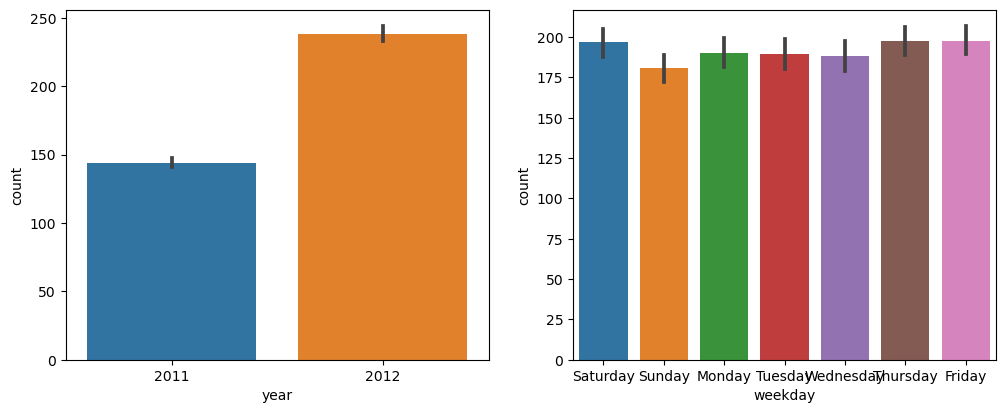

In [847]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(221)
ax1 = sns.barplot(x="year",y="count",data=train)
ax2 = fig.add_subplot(222)
ax2 = sns.barplot(x="weekday",y="count",data=train)

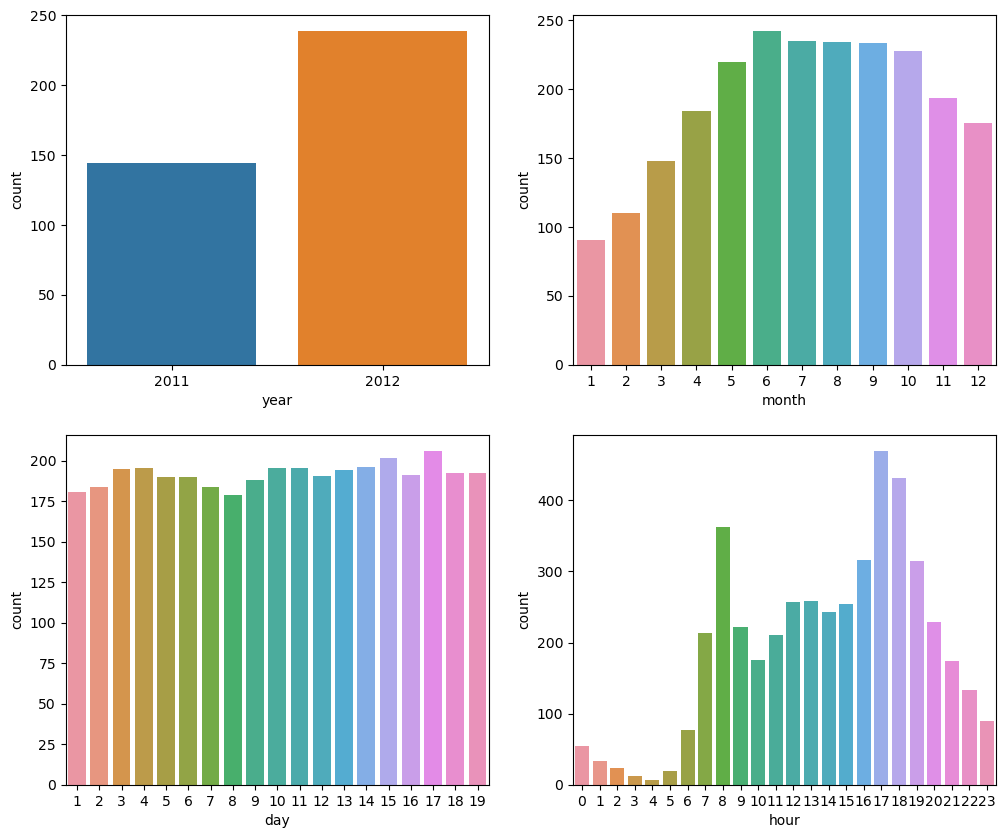

In [848]:
fig=plt.figure(figsize=[12,10])

ax1=fig.add_subplot(2,2,1)
ax1=sns.barplot(x='year', y='count', data=train.groupby('year')['count'].mean().reset_index())
ax2=fig.add_subplot(2,2,2)
ax2=sns.barplot(x='month', y='count', data=train.groupby('month')['count'].mean().reset_index())
ax3=fig.add_subplot(2,2,3)
ax3=sns.barplot(x='day', y='count', data=train.groupby('day')['count'].mean().reset_index())
ax4=fig.add_subplot(2,2,4)
ax4=sns.barplot(x='hour', y='count', data=train.groupby('hour')['count'].mean().reset_index())
#day는 전혀 상관 없음

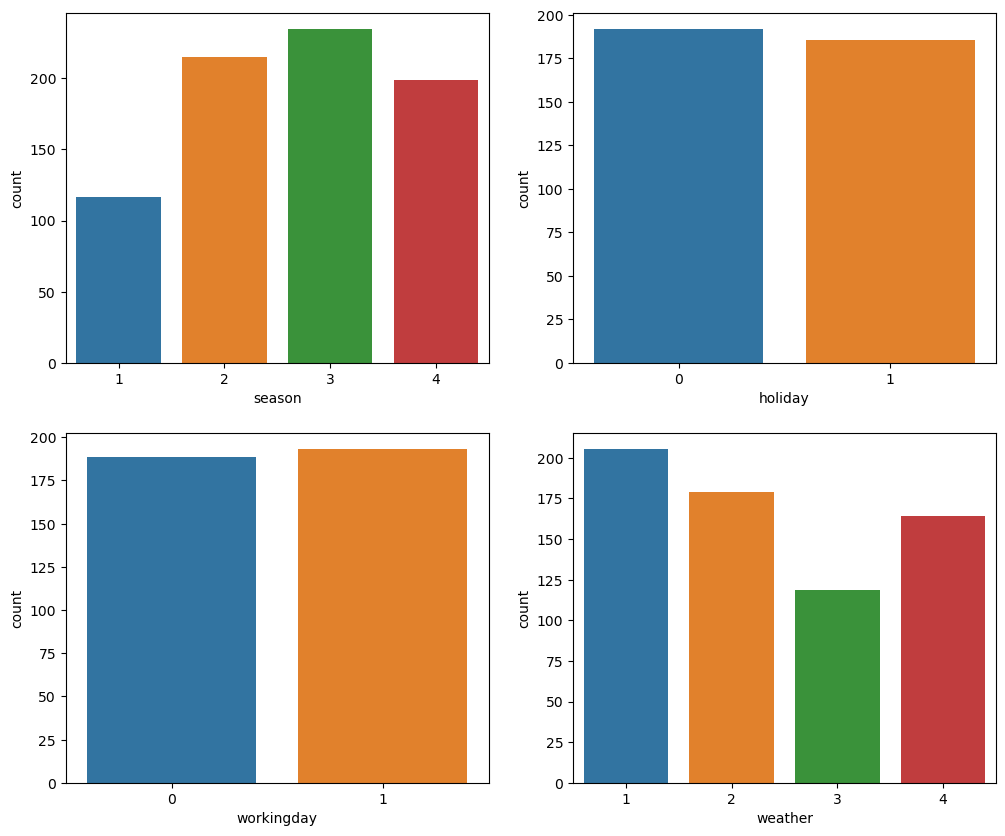

In [849]:
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x="season", y="count", data=train.groupby("season")["count"].mean().reset_index())
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x="holiday", y="count", data=train.groupby("holiday")["count"].mean().reset_index())
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x="workingday", y="count", data=train.groupby("workingday")["count"].mean().reset_index())
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x="weather", y="count", data=train.groupby("weather")["count"].mean().reset_index())

In [850]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday


In [851]:
train.month
train.season
# 봄(3,4,5월):1 .....겨울(12,1,2월):4

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

In [852]:
def newSeason(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    else:
        return 3

In [853]:
train["season"] = train.month.apply(newSeason)

In [854]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


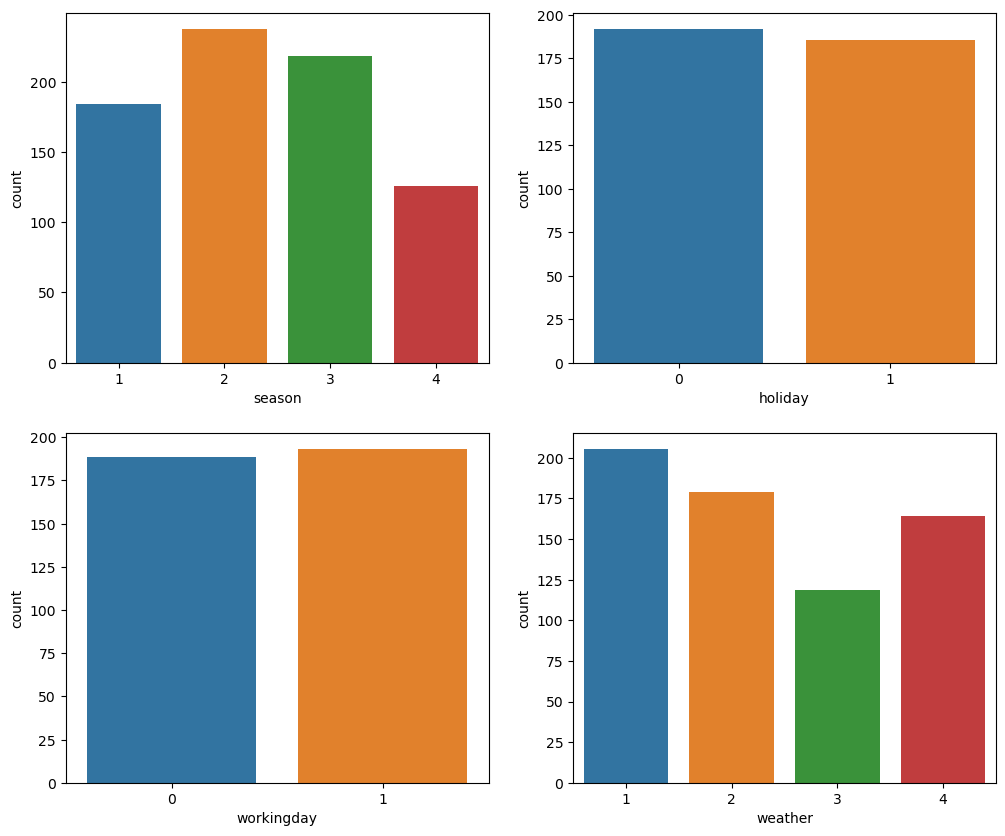

In [855]:
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x="season", y="count", data=train.groupby("season")["count"].mean().reset_index())
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x="holiday", y="count", data=train.groupby("holiday")["count"].mean().reset_index())
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x="workingday", y="count", data=train.groupby("workingday")["count"].mean().reset_index())
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x="weather", y="count", data=train.groupby("weather")["count"].mean().reset_index())

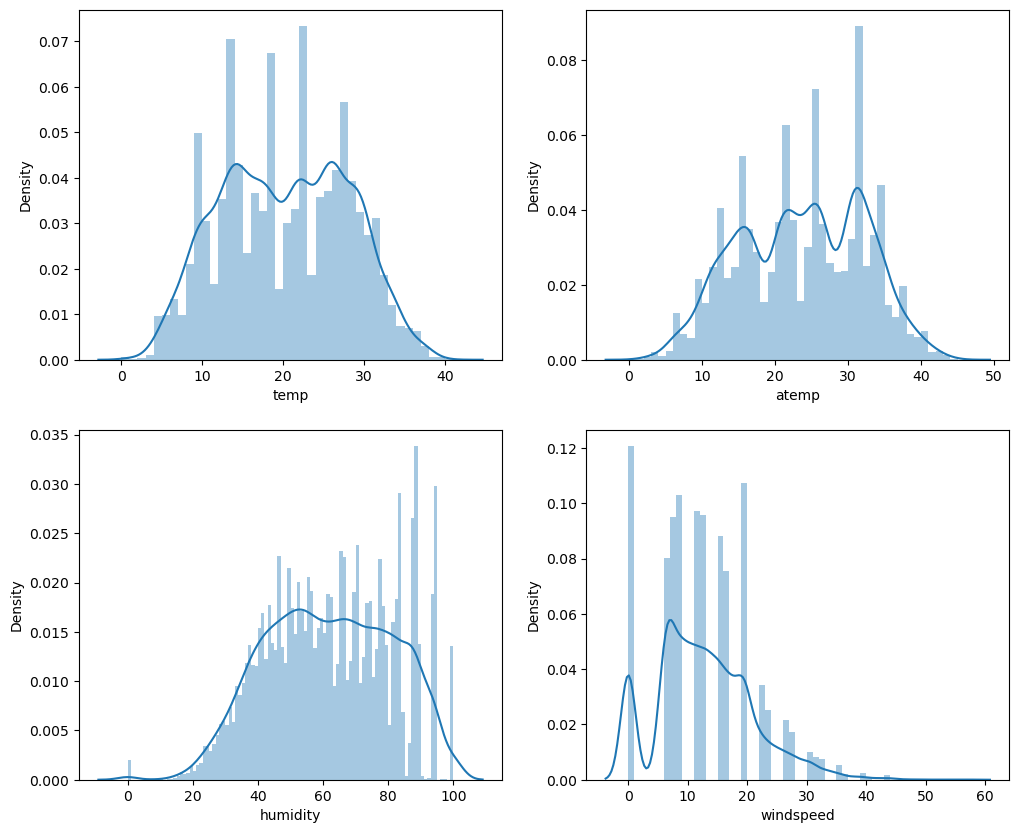

In [856]:
#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(int(train.temp.min()),int(train.temp.max())+1))
# 체감온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(int(train.atemp.min()),int(train.atemp.max())+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(int(train.humidity.min()),int(train.humidity.max())+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))

In [857]:
train[train["windspeed"]==0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,Monday
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,Monday
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,Tuesday
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,Tuesday


<Axes: >

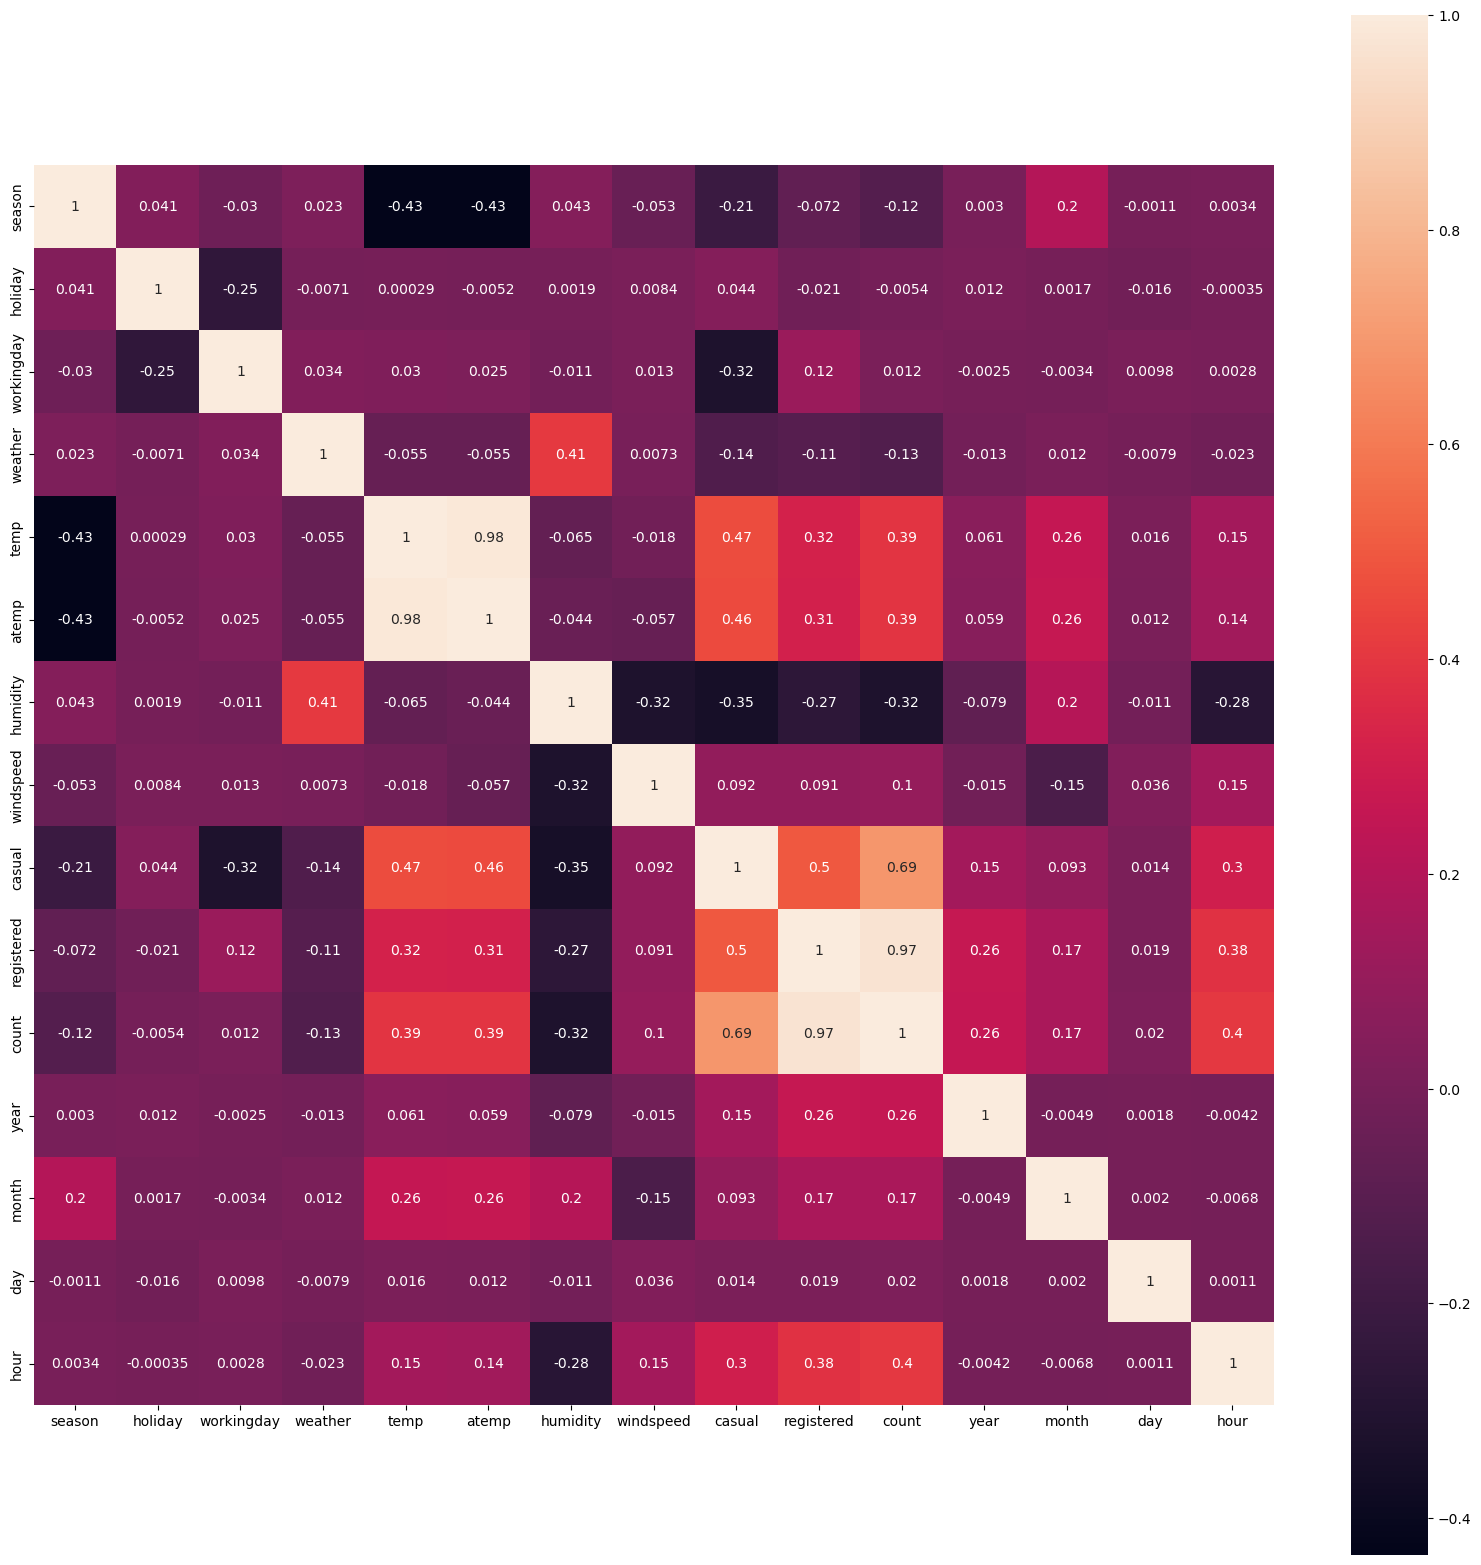

In [858]:
fig = plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

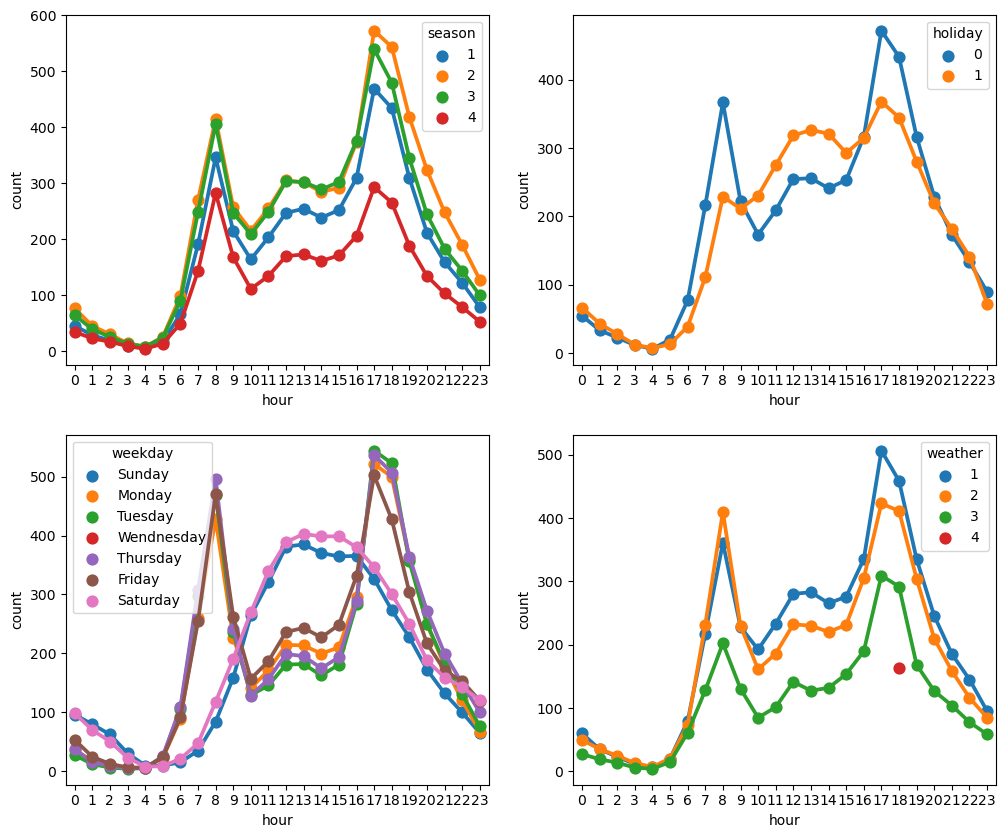

In [859]:
#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [860]:
train[train.weather ==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,Monday


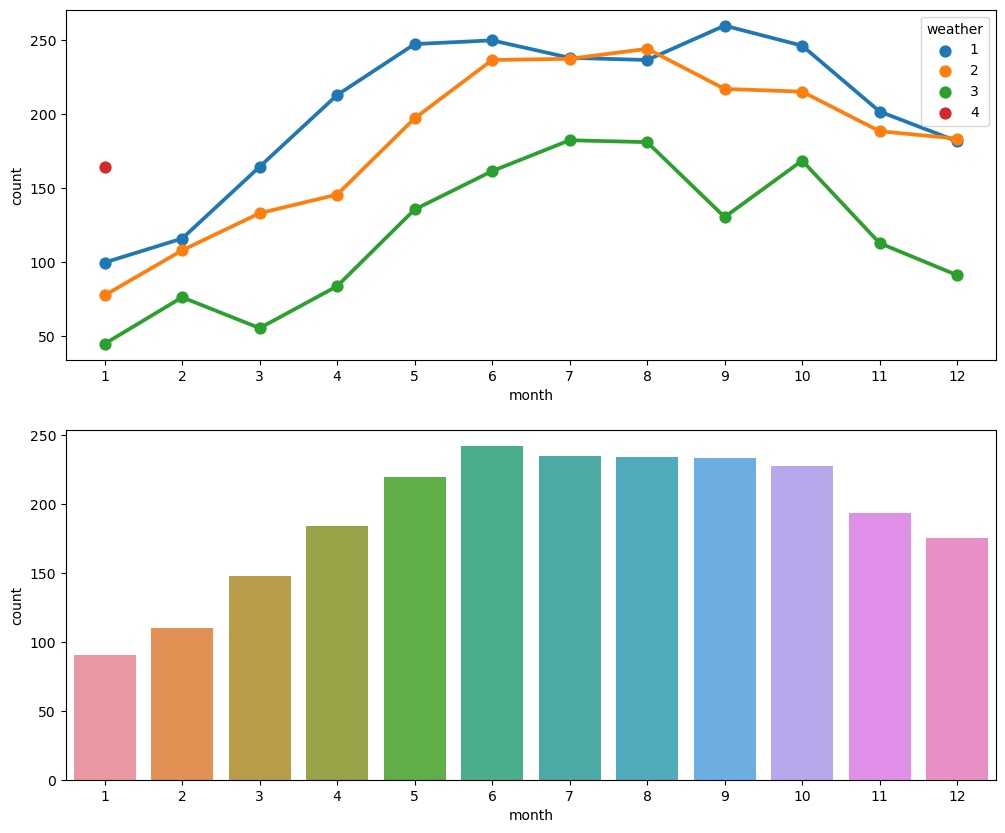

In [861]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())


ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [862]:
train["weekday"] = train.weekday.astype("category")

In [863]:
train["weekday"].cat.categories

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [864]:
train["weekday"].cat.categories= ["5","1","6","0","4","2","3"]

In [865]:
train["weekday"]

0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: category
Categories (7, object): ['5', '1', '6', '0', '4', '2', '3']

In [866]:
"""
풍속이 0이 아닌 값들로 구성된 데이터프레임에서 풍속 예측 모델 생성
-> 풍속이 0인 값들로 구성된 데이터프레임에 대한 풍속을 예측하여 값을 저장
"""
from sklearn.ensemble import RandomForestRegressor

In [867]:
windspeed_0 = train[train.windspeed ==0]
windspeed_not0 = train[train.windspeed !=0]

In [868]:
windspeed_0_df = windspeed_0.drop(["datetime","windspeed","casual","registered","count","holiday","workingday","day","weekday"],
                axis = 1)

In [869]:
windspeed_0_df

,season,weather,temp,atemp,humidity,year,month,hour
0,4,1,9.84,14.395,81,2011,1,0
1,4,1,9.02,13.635,80,2011,1,1
2,4,1,9.02,13.635,80,2011,1,2
3,4,1,9.84,14.395,75,2011,1,3
4,4,1,9.84,14.395,75,2011,1,4
...,...,...,...,...,...,...,...,...
10826,4,2,16.40,20.455,87,2012,12,12
10829,4,2,17.22,21.210,88,2012,12,15
10846,4,1,15.58,19.695,94,2012,12,8
10860,4,1,13.94,16.665,49,2012,12,22


In [870]:
windspeed_not0_df = windspeed_not0.drop(["datetime","windspeed","casual","registered","count","holiday","workingday","day","weekday"],
                axis = 1)

In [871]:
windspeed_not0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,2012,12,19
10882,4,1,14.76,17.425,57,2012,12,20
10883,4,1,13.94,15.910,61,2012,12,21
10884,4,1,13.94,17.425,61,2012,12,22


In [872]:
windspeed_not0_series = windspeed_not0["windspeed"]

In [873]:
rf = RandomForestRegressor()

In [874]:
rf.fit(windspeed_not0_df,windspeed_not0_series)

RandomForestRegressor()

In [875]:
windspeed_0["windspeed"] = rf.predict(windspeed_0_df)

In [876]:
windspeed_0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.462192,3,13,16,2011,1,1,0,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.462326,8,32,40,2011,1,1,1,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.582189,5,27,32,2011,1,1,2,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.622682,3,10,13,2011,1,1,3,6
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.442854,0,1,1,2011,1,1,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,14.130851,21,211,232,2012,12,17,12,1
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,11.011554,15,196,211,2012,12,17,15,1
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,7.591904,10,652,662,2012,12,18,8,2
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.348368,5,127,132,2012,12,18,22,2


In [877]:
train = pd.concat([windspeed_0,windspeed_not0],axis=0)
train
train[train.windspeed==0] # 풍속 0인것 다 처리했다.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday


In [878]:
#train.info()
train.datetime = pd.to_datetime(train.datetime)

In [879]:
train = train.sort_values(["datetime"], ascending = False)
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.998100,4,84,88,2012,12,19,23,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,129,2012,12,19,22,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,168,2012,12,19,21,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,241,2012,12,19,20,3
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,336,2012,12,19,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.442854,0,1,1,2011,1,1,4,6
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.622682,3,10,13,2011,1,1,3,6
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,7.582189,5,27,32,2011,1,1,2,6
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,7.462326,8,32,40,2011,1,1,1,6


<Axes: >

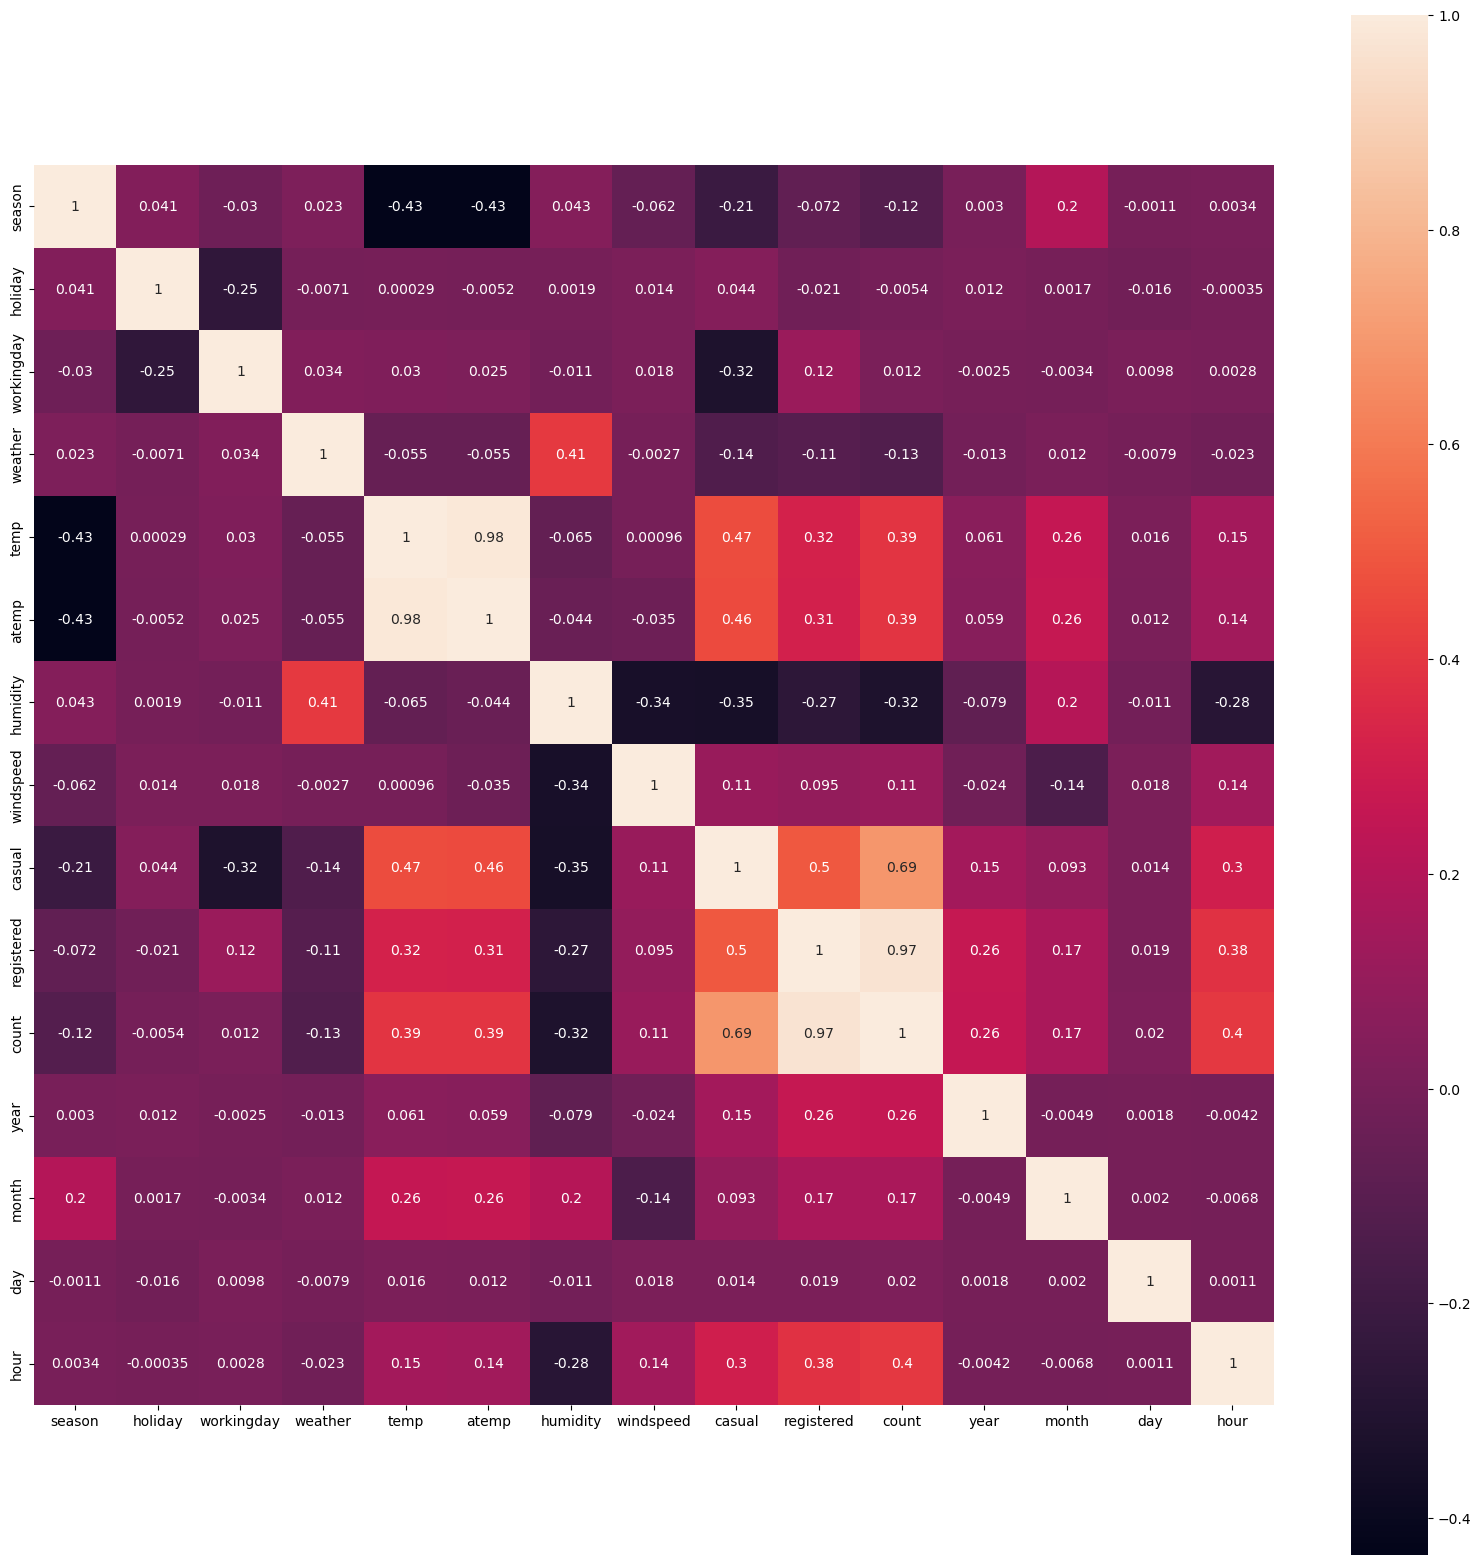

In [880]:
plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True,square=True)

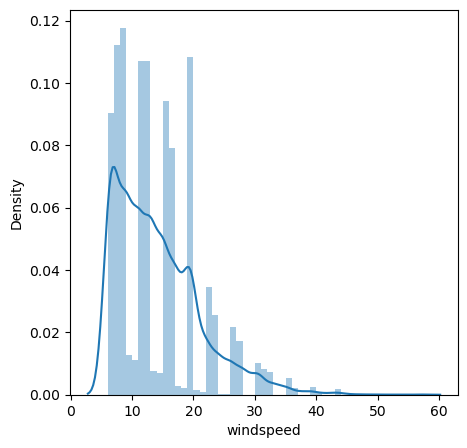

In [881]:
#바람속도와 count
plt.figure(figsize=[5,5])
sns.distplot(train.windspeed,bins=range(int(train.windspeed.min()),int(train.windspeed.max())+1))
plt.show()

In [882]:
train = pd.read_csv("C:/Users/user/Documents/Kaggle/Bike-Sharing-Demand/train.csv")
test = pd.read_csv("C:/Users/user/Documents/Kaggle/Bike-Sharing-Demand/test.csv")

In [883]:
combine = pd.concat([train,test],axis=0)
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [885]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [886]:
combine['year'] = pd.to_numeric(combine.year)
combine['month'] = pd.to_numeric(combine.month)
combine['day'] = pd.to_numeric(combine.day)
combine['hour'] = pd.to_numeric(combine.hour)

In [887]:
combine["season"] = combine.month.apply(newSeason)

In [888]:
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 19:00:00]",Monday,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 20:00:00]",Monday,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,"[2012-12-31, 21:00:00]",Monday,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,"[2012-12-31, 22:00:00]",Monday,2012,12,31,22


In [889]:
combine.weekday = combine.weekday.astype('category')

In [890]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [891]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [892]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [893]:
dataWind0_df=dataWind0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday',"tempDate"], axis=1)
dataWindNot0_df=dataWindNot0.drop(['datetime','windspeed','casual', 'registered','count', 'holiday', 'workingday', 'day', 'weekday',"tempDate"], axis=1)

In [894]:
dataWindNot0_Series = dataWindNot0["windspeed"]
dataWindNot0_df

,season,weather,temp,atemp,humidity,year,month,hour
5,4,2,9.84,12.880,75,2011,1,5
10,4,1,15.58,19.695,76,2011,1,10
11,4,1,14.76,16.665,81,2011,1,11
12,4,1,17.22,21.210,77,2011,1,12
13,4,2,18.86,22.725,72,2011,1,13
...,...,...,...,...,...,...,...,...
6488,4,2,10.66,12.880,60,2012,12,19
6489,4,2,10.66,12.880,60,2012,12,20
6490,4,1,10.66,12.880,60,2012,12,21
6491,4,1,10.66,13.635,56,2012,12,22


In [895]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,dataWindNot0_Series)

RandomForestRegressor()

In [896]:
pred = rf2.predict(dataWind0_df)
pred

array([ 7.02919333,  6.67925233,  6.29949633, ...,  8.006768  ,
       24.730169  ,  8.380829  ])

In [897]:
dataWind0["windspeed"] = pred
dataWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,7.029193,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",6,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,6.679252,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",6,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,6.299496,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",6,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,6.259564,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",6,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,6.239531,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",6,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,8.642196,NaN,NaN,NaN,"[2012-12-29, 12:00:00]",6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.762260,NaN,NaN,NaN,"[2012-12-29, 13:00:00]",6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,8.006768,NaN,NaN,NaN,"[2012-12-29, 15:00:00]",6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,24.730169,NaN,NaN,NaN,"[2012-12-29, 23:00:00]",6,2012,12,29,23


In [898]:
dataWindNot0
combine = pd.concat([dataWindNot0,dataWind0])
combine.drop("tempDate",axis = 1, inplace = True)
combine

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
5,2011-01-01 05:00:00,4,0,0,2,9.84,12.880,75,6.003200,0.0,1.0,1.0,6,2011,1,1,5
10,2011-01-01 10:00:00,4,0,0,1,15.58,19.695,76,16.997900,12.0,24.0,36.0,6,2011,1,1,10
11,2011-01-01 11:00:00,4,0,0,1,14.76,16.665,81,19.001200,26.0,30.0,56.0,6,2011,1,1,11
12,2011-01-01 12:00:00,4,0,0,1,17.22,21.210,77,19.001200,29.0,55.0,84.0,6,2011,1,1,12
13,2011-01-01 13:00:00,4,0,0,2,18.86,22.725,72,19.999500,47.0,47.0,94.0,6,2011,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,2012-12-29 12:00:00,4,0,0,3,8.20,12.120,100,8.642196,NaN,NaN,NaN,6,2012,12,29,12
6434,2012-12-29 13:00:00,4,0,0,3,8.20,12.120,100,8.762260,NaN,NaN,NaN,6,2012,12,29,13
6436,2012-12-29 15:00:00,4,0,0,2,9.84,12.120,87,8.006768,NaN,NaN,NaN,6,2012,12,29,15
6444,2012-12-29 23:00:00,4,0,0,2,10.66,12.120,60,24.730169,NaN,NaN,NaN,6,2012,12,29,23


In [899]:
combine["season"].astype("category")

5       4
10      4
11      4
12      4
13      4
       ..
6433    4
6434    4
6436    4
6444    4
6464    4
Name: season, Length: 17379, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [900]:
pd.get_dummies(combine["season"]) # 원핫 인코딩

,1,2,3,4
5,0,0,0,1
10,0,0,0,1
11,0,0,0,1
12,0,0,0,1
13,0,0,0,1
...,...,...,...,...
6433,0,0,0,1
6434,0,0,0,1
6436,0,0,0,1
6444,0,0,0,1


In [ ]:
"""
데이터 타입 : 수치형, 범주형
수치형 : 연속형(실수), 이산형(정수)
범주형(종류) : 명목형(순서가 없음), 순서형
"""

In [901]:
cate_cols = ["season","weather","weekday","year","month","hour"]
drop_cols = ["datetime","casual","registered","count","day"]

In [902]:
for col in cate_cols:
    combine[col] = combine[col].astype("category")
# 원하는 데이터 카테고리화

In [903]:
combine['month']
train=combine[pd.notnull(combine['count'])].sort_values("datetime")
train

ylabel=train['count']
datetimecol=test['datetime']

In [904]:
test = combine[~pd.notnull(combine["count"])].sort_values("datetime")
# 홀드 아웃 진행
train
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-20 00:00:00,4,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,4,2011,1,20,0
1,2011-01-20 01:00:00,4,0,1,1,10.66,13.635,56,9.349046,NaN,NaN,NaN,4,2011,1,20,1
2,2011-01-20 02:00:00,4,0,1,1,10.66,13.635,56,8.989390,NaN,NaN,NaN,4,2011,1,20,2
3,2011-01-20 03:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,4,2011,1,20,3
4,2011-01-20 04:00:00,4,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,4,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,19
6489,2012-12-31 20:00:00,4,0,1,2,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,20
6490,2012-12-31 21:00:00,4,0,1,1,10.66,12.880,60,11.001400,NaN,NaN,NaN,1,2012,12,31,21
6491,2012-12-31 22:00:00,4,0,1,1,10.66,13.635,56,8.998100,NaN,NaN,NaN,1,2012,12,31,22


In [905]:
drop_cols
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [906]:
train.head()
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weekday,year,month,hour
0,4,0,1,1,10.66,11.365,56,26.002700,4,2011,1,0
1,4,0,1,1,10.66,13.635,56,9.349046,4,2011,1,1
2,4,0,1,1,10.66,13.635,56,8.989390,4,2011,1,2
3,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,3
4,4,0,1,1,10.66,12.880,56,11.001400,4,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,4,0,1,2,10.66,12.880,60,11.001400,1,2012,12,19
6489,4,0,1,2,10.66,12.880,60,11.001400,1,2012,12,20
6490,4,0,1,1,10.66,12.880,60,11.001400,1,2012,12,21
6491,4,0,1,1,10.66,13.635,56,8.998100,1,2012,12,22


In [907]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [908]:
rf = RandomForestRegressor()
rf_params = {"n_estimators":[10,30,50,70,100,200]}

In [909]:
grid_cf = GridSearchCV(rf,rf_params,scoring="neg_mean_squared_log_error",cv=5)

In [910]:
grid_cf.fit(train,ylabel)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 30, 50, 70, 100, 200]},
             scoring='neg_mean_squared_log_error')

In [912]:
pred=grid_cf.predict(test)
pred

array([ 10.5       ,   5.3       ,   3.        , ..., 160.96666667,
       112.6       ,  62.23333333])

In [913]:
grid_cf.predict(train)

array([ 19.33333333,  34.4       ,  27.86666667, ..., 177.7       ,
       146.6       ,  91.03333333])

In [915]:
mysubmission=pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
mysubmission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [916]:
mysubmission["count"] = pred

In [917]:
mysubmission.to_csv("mysubmission_RandomForestRegressor.csv",index=False)

In [918]:
from sklearn.ensemble import GradientBoostingRegressor

In [919]:
gb = GradientBoostingRegressor()

In [920]:
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring='neg_mean_squared_log_error',cv=5)
grid_gb.fit(train,ylabel)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': [1, 10, 100]},
             scoring='neg_mean_squared_log_error')

In [921]:
preds = grid_gb.predict(test)

In [929]:
mysubmission2["count"] = preds
mysubmission2 = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
mysubmission2

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [930]:
mysubmission2.to_csv("mysubmission_GradientBoosting.csv",index=False)